In [1]:
import pandas as pd
import numpy as np
import scipy

# Dataviz
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# preprocessing
from sklearn.preprocessing import StandardScaler


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregando o dataset

data = pd.read_csv('Dados\cars.csv')

In [3]:
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
data.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [5]:
# verificando informações gerais do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [6]:
# colunas
data.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [7]:
# Valores unicos
data.nunique()

mpg            103
cylinders        5
cubicinches     75
hp              85
weightlbs      240
time-to-60      17
year            13
brand            3
dtype: int64

# Data preparation / Cleaning

In [8]:
# transformando colunas objetc em numerica
colunas = ['cubicinches', 'weightlbs']
data[colunas] = data[colunas].apply(pd.to_numeric, errors='coerce', axis=1)

In [9]:
# verificando valores nulos
data.isnull().sum().sort_values(ascending=False)

weightlbs      3
cubicinches    2
mpg            0
cylinders      0
hp             0
time-to-60     0
year           0
brand          0
dtype: int64

In [10]:
# Verificando os registros que contem valores nulos
data[data.isnull().any(axis=1)]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
14,19.1,6,225.0,90,NaN,19,1981,US.
33,21.0,6,199.0,90,NaN,15,1971,US.
40,16.0,6,NaN,105,3897.0,19,1976,US.
172,29.0,4,68.0,49,NaN,20,1974,Europe.
180,19.8,6,NaN,85,2990.0,18,1980,US.


In [11]:
# Para os valores nulos, vamos atribuir a media dos valores 
data['cubicinches'].fillna(data.cubicinches.mean(), inplace=True)
data['weightlbs'].fillna(data.weightlbs.mean(), inplace=True)

# EDA

In [12]:
data.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


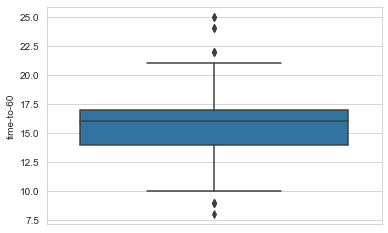

In [13]:
# Verificando os dados da feature 'time-to-60' através de um boxplot
sns.set_style("whitegrid")  
sns.boxplot(y='time-to-60', data=data);

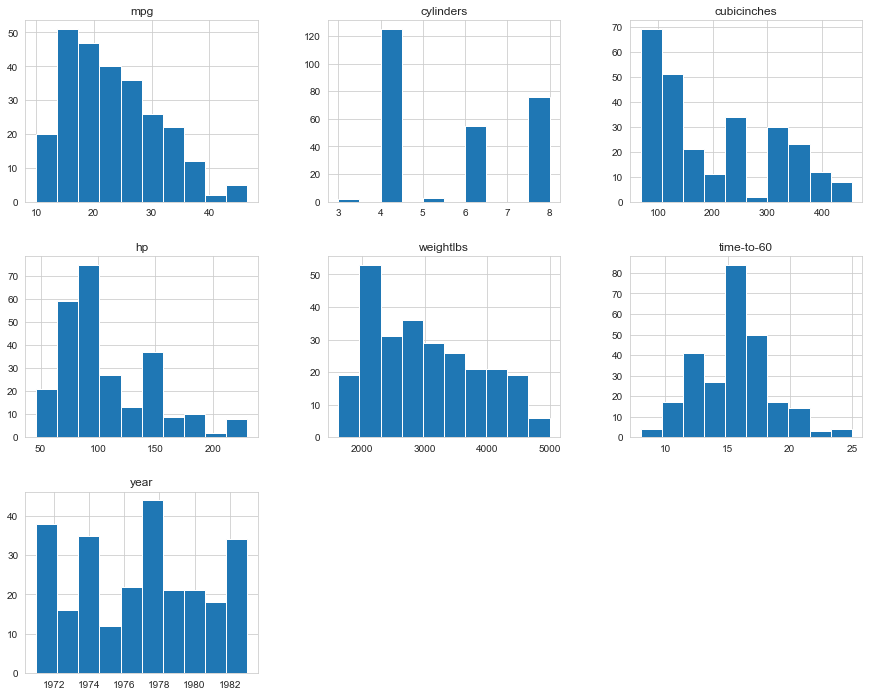

In [14]:
# Distribuição dos dados
data.hist(figsize = (15, 12));

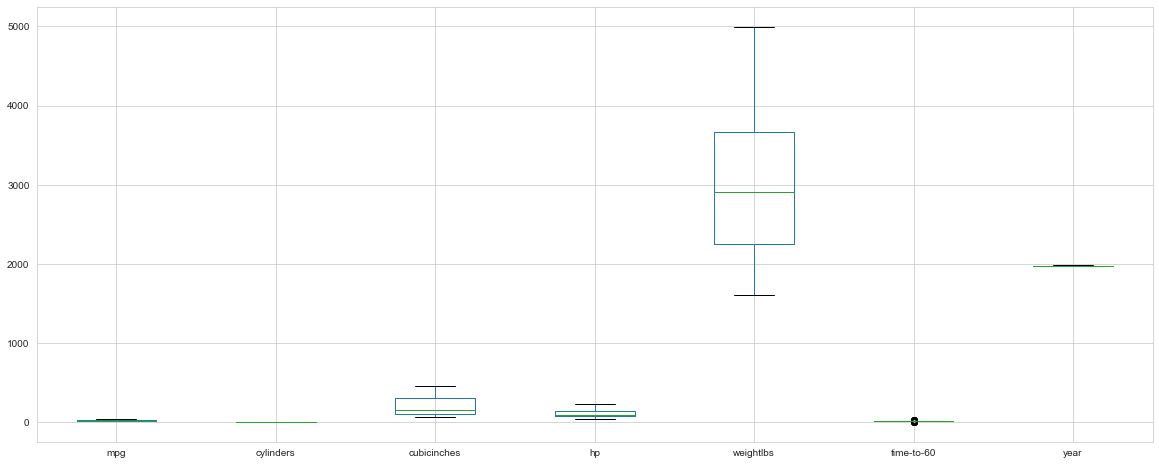

In [15]:
data.boxplot(figsize = (20, 8));

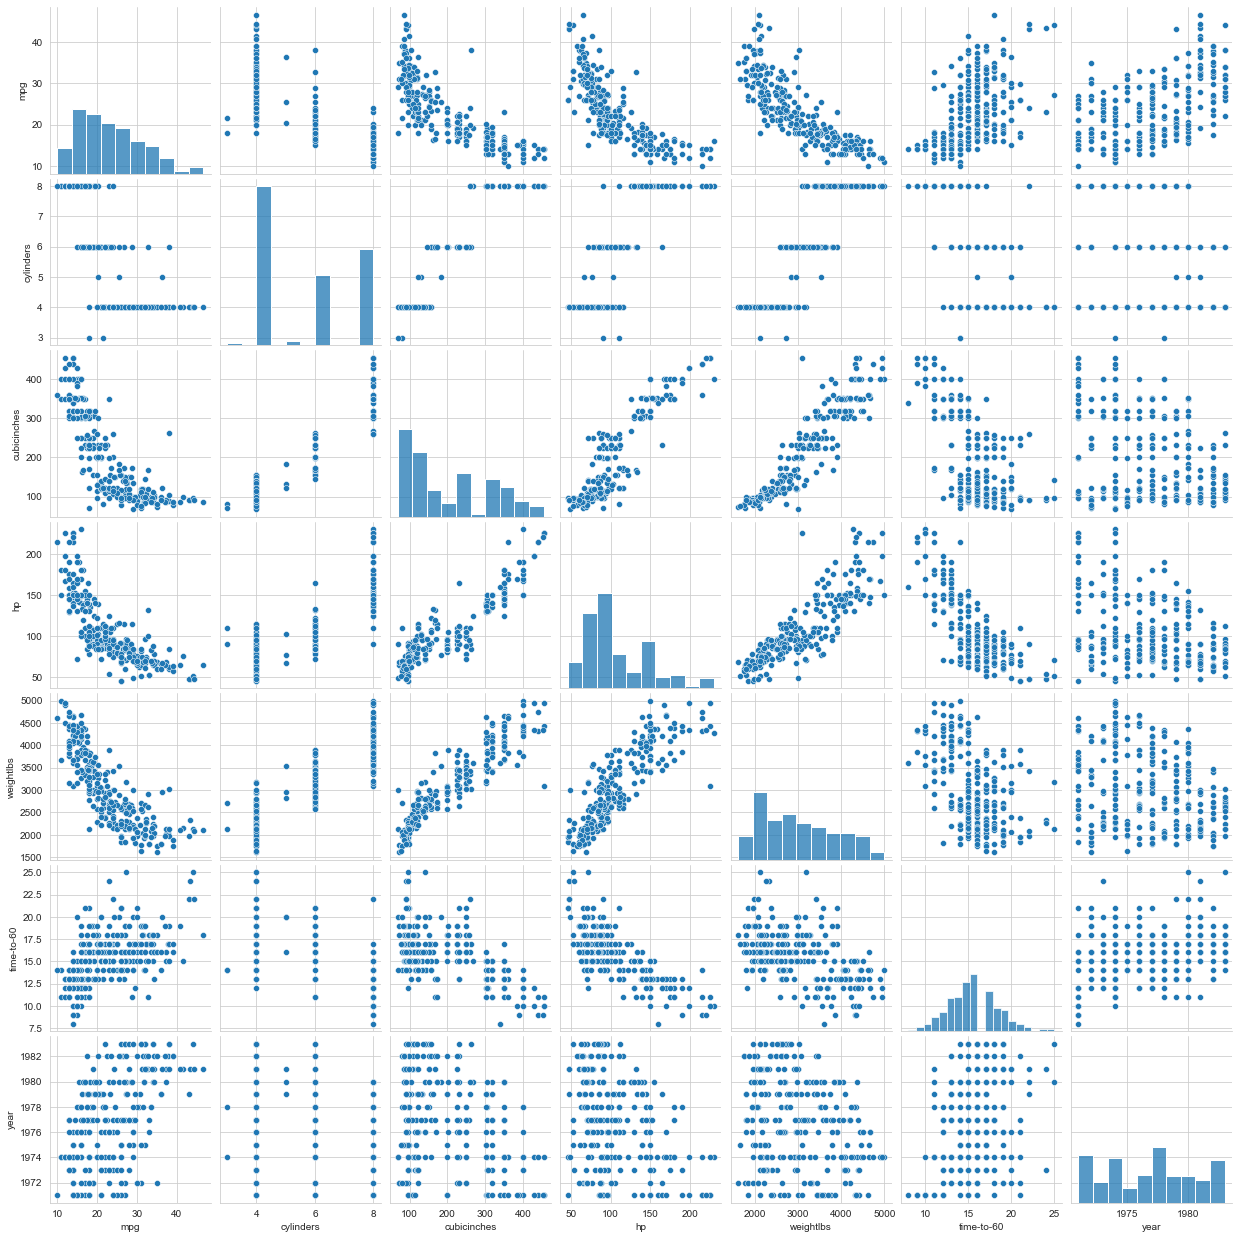

In [16]:
sns.pairplot(data)

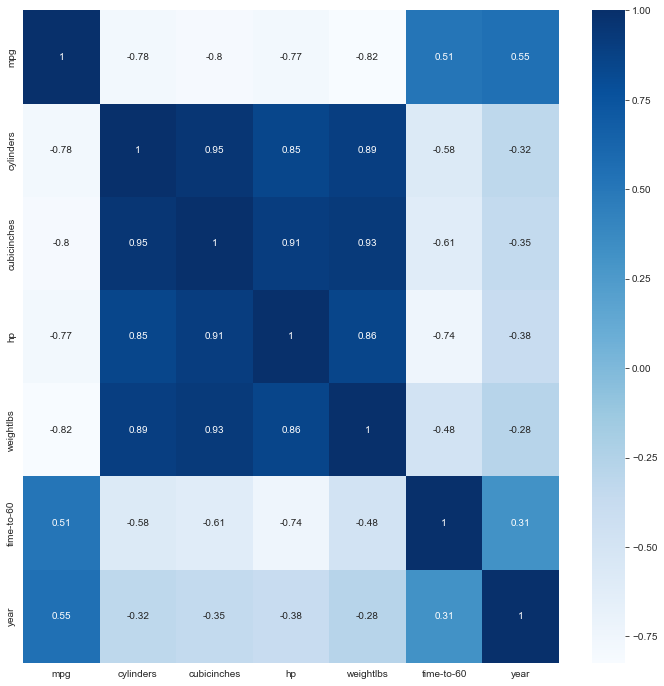

In [17]:
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(data.corr(), annot = True, cmap = 'Blues', ax = ax);

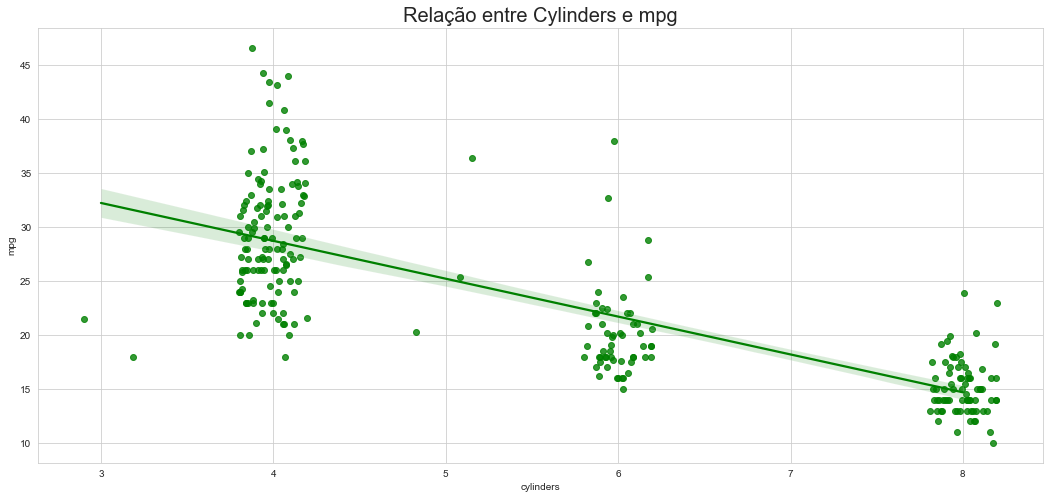

In [18]:
# Visualiza um gráfico entre as variaveis cylinders e mpg e verificar se existe alguma correlação linear
plt.figure(figsize=(18, 8))
sns.regplot(x='cylinders', y='mpg', data=data, color='g', x_jitter=0.2)
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.title('Relação entre Cylinders e mpg', fontsize=20)
plt.show();

In [19]:
# Funcao para calcular o coeficiente de correlacao entre duas variaveis
def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2   

In [20]:
# Calculando o coeficiente de correlação entre 'cylinders' e 'mpg' através do r2
rsquared(data['cylinders'], data['mpg'])

0.6032782423312303

In [21]:
# Calculando o coeficiente de correlação pelo OLS e exibindo um sumario
model = sm.OLS(data['mpg'], data['cylinders'])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.692
Model:                            OLS   Adj. R-squared (uncentered):              0.691
Method:                 Least Squares   F-statistic:                              583.7
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                    2.07e-68
Time:                        08:54:34   Log-Likelihood:                         -1050.8
No. Observations:                 261   AIC:                                      2104.
Df Residuals:                     260   BIC:                                      2107.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cylinders      3.4721      0.144     24.160      0.000       3.189       3.755
==============================================================================
Omnibus:                      164.032   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.509
Skew:                           0.004   Prob(JB):                     0.000260
Kurtosis:                       1.768   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Machine Learning


In [22]:
# Cria o padronizador
scaler = StandardScaler()

# Definindo somente colunas numericas a serem padronizadas
num_cols = data.columns[data.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

# Criar uma copia do dataset original
new_df = data[num_cols]

# Padronizando os dados
new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

# Exibindo os primeiros registros
new_df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025


In [23]:
# Verificando o maior valor para a feature 'hp'
new_df['hp'].max()

3.05870398977614

## PCA

In [24]:
# Criando o objeto PCA com 7 componentes
pca = PCA(n_components=7)

# Realizando o fit com os dados tratados
principalComponents = pca.fit_transform(new_df)

# Salvando em um dataframe
PCA_components = pd.DataFrame(principalComponents)
PCA_components.head()

,0,1,2,3,4,5,6
0,3.485219,0.526326,-0.139738,0.258792,0.086902,-0.179206,0.079078
1,-2.176912,-0.285424,-1.304613,-0.100465,-0.289698,-0.041147,-0.013127
2,2.684973,1.046946,-0.732156,0.498227,-0.535168,-0.075745,0.159956
3,3.534648,0.847619,-0.801334,0.506630,-0.435696,-0.144237,-0.483162
4,-2.299222,0.194808,-0.221704,0.079650,-0.175655,0.015566,-0.069958


In [25]:
# Exibindo o valor da variância explicada por cada componente
print(pca.explained_variance_ratio_)

[0.72371349 0.12675138 0.09126131 0.02773591 0.01766794 0.00798425
 0.00488572]


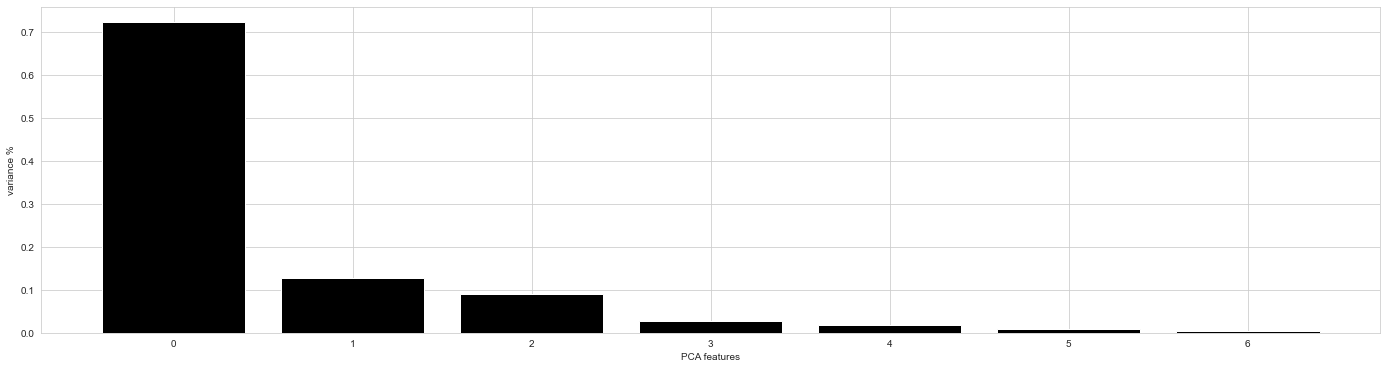

In [26]:
# Plot da variação explicada pelos componentes
features = range(pca.n_components_)

fig, aux = plt.subplots(1,1, figsize=(24, 6))
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features);

# Kmeans

In [27]:
# Inicializando o kmeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Treinar o modelo utilizando apenas os tres primeiros componentes principais
kmeans.fit(PCA_components.iloc[:,:3])

# Realizando as previsoes dos cluster
X_clustered = kmeans.predict(PCA_components.iloc[:,:3])


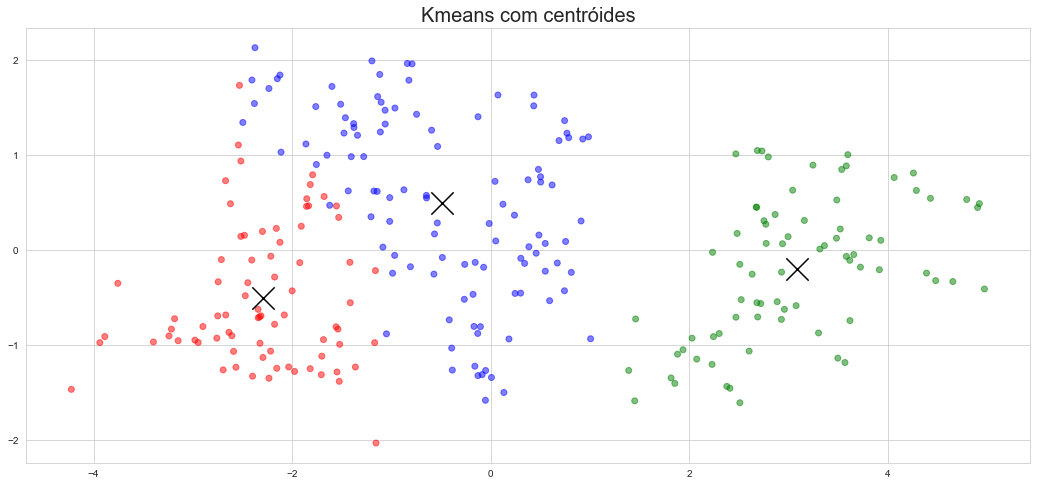

In [28]:
# Definindo um mapa de cor para cada cluster
color_map = {0:'r', 1: 'g', 2: 'b'}
label_color = [color_map[l] for l in X_clustered]

# Definindo os centroides
centers = np.array(kmeans.cluster_centers_)

# Exibindo um grafico scatter
fig, aux = plt.subplots(1,1, figsize=(18, 8))
plt.title('Kmeans com centróides', fontsize=20)
plt.scatter(principalComponents[:,0],principalComponents[:,1], c= label_color, alpha=0.5) 
plt.scatter(centers[:,0], centers[:,1], marker="x", color='black', s=500)
plt.show();


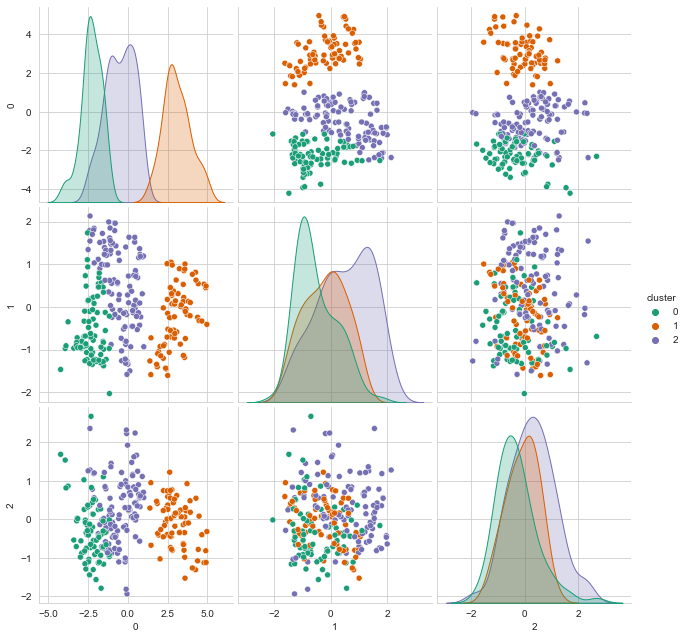

In [29]:
# Criando um dataframe do nosso PCA
df = pd.DataFrame(PCA_components)

# Selecionando somente os 3 primeiros componentes
df = df[[0,1,2]]
df['cluster'] = X_clustered

# Visualizando nossos clusters com os dados do PCA
sns.pairplot(df, hue='cluster', palette= 'Dark2', diag_kind='kde', size=3);

2    109
0     77
1     75
Name: cluster, dtype: int64


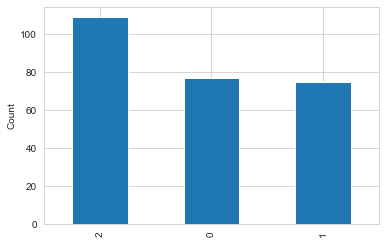

In [30]:
# Verificando a quantidade em cada um dos clusters
print(df['cluster'].value_counts())

# Exibindo em um gráfico
df['cluster'].value_counts().plot(kind = 'bar')
plt.ylabel('Count');

## Classificação

### Criando um novo dataset

In [31]:
# Realizando o merge com o dataset original e do pca, gerando um novo dataset
df_final = data.merge(df, left_index=True, right_index=True)

# Cria a nova feature mpg
# Regra: veículos que percorrem mais de 25 milhas com um galão (“mpg” > 25) devem ser considerados eficientes
df_final['new_mpg'] = np.where(df_final['mpg'] > 25, 1, 0)

# Exibir o dataset final
df_final.head()


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,0,1,2,cluster,new_mpg
0,14.0,8,350.0,165,4209.0,12,1972,US.,3.485219,0.526326,-0.139738,1,0
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,-2.176912,-0.285424,-1.304613,0,1
2,17.0,8,302.0,140,3449.0,11,1971,US.,2.684973,1.046946,-0.732156,1,0
3,15.0,8,400.0,150,3761.0,10,1971,US.,3.534648,0.847619,-0.801334,1,0
4,30.5,4,98.0,63,2051.0,17,1978,US.,-2.299222,0.194808,-0.221704,0,1


In [32]:
# separando em X e Y
X = df_final[['cylinders','cubicinches','hp','weightlbs','time-to-60']]
y = df_final['new_mpg']

In [33]:
# instancia a padronização
scaler = StandardScaler()

# fit a padronização s
X = scaler.fit_transform(X)

In [34]:
# separando em treino e teste
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = seed,
                                                   )

In [35]:
# verifica o shape dos arrays criados
X_train.shape, y_train.shape,X_test.shape, X_train.shape

((182, 5), (182,), (79, 5), (182, 5))

In [36]:
# Preparando a lista de modelos
model = []
model.append(('Logistic Regression', LogisticRegression(random_state=42)))
model.append(('Decision Tree', DecisionTreeClassifier(random_state=42)))

# Avaliando cada modelo em um loop
for nome, model in model:
    
    # realizando o fit do modelo
    model.fit(X_train, y_train)
    
    # avaliando o score com dados de validação
    score = model.score(X_test, y_test)   
    
    # exibindo o resultado
    print('\n')
    msg = "%s: %f" % (nome, score)
    print(msg)



Logistic Regression: 0.860759


Decision Tree: 0.873418


## Decision Tree

In [37]:
# Treinando o modelo de Arvore de Decisão
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

# Realizar as previsões
y_pred = clf_dt.predict(X_test)

# Fazendo as previsões e construindo o relatório
result = classification_report(y_test, y_pred)

# Imprimindo o relatório
print(result)

              precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.82      0.95      0.88        38

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79



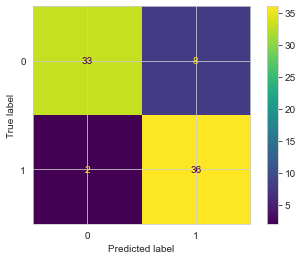

In [38]:
# Permite verificar a acurácia em um formato de tabela
# matrix = confusion_matrix(y_test, y_pred)

# Chamando a função para visualizar a confusion matrix
plot_confusion_matrix(clf_dt, 
                      X_test, 
                      y_test)
plt.show()

## Logistic Regression

In [39]:
# Treinando o modelo de Regressão Logística
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train, y_train)

# Realizar as previsões
y_pred = clf_lr.predict(X_test)

# Fazendo as previsões e construindo o relatório
result = classification_report(y_test, y_pred)

# Imprimindo o relatório
print(result)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.86      0.84      0.85        38

    accuracy                           0.86        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.86      0.86      0.86        79



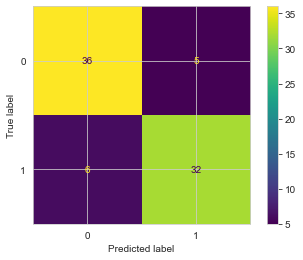

In [40]:
# Permite verificar a acurácia em um formato de tabela
# matrix = confusion_matrix(y_test, y_pred)

# Chamando a função para visualizar a confusion matrix
plot_confusion_matrix(clf_lr,
                      X_test, 
                      y_test) 

plt.show()